In [66]:
import warnings
warnings.filterwarnings('ignore')
#importing the libraries
import numpy as np
import pandas as pd
from google.colab import drive
import os
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [67]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [68]:
df = pd.read_csv('/content/drive/MyDrive/Practice data/crop_production.csv')

In [69]:
df.head(5)

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [70]:
# converting data type to its suitable format

df = df.infer_objects()

In [71]:
# checking shape of dataset

df.shape

(246091, 7)

In [72]:
# To describe the data set

df.describe()

,Crop_Year,Area,Production
count,246091.000000,2.460910e+05,2.423610e+05
mean,2005.643018,1.200282e+04,5.825034e+05
std,4.952164,5.052340e+04,1.706581e+07
min,1997.000000,4.000000e-02,0.000000e+00
25%,2002.000000,8.000000e+01,8.800000e+01
50%,2006.000000,5.820000e+02,7.290000e+02
75%,2010.000000,4.392000e+03,7.023000e+03
max,2015.000000,8.580100e+06,1.250800e+09


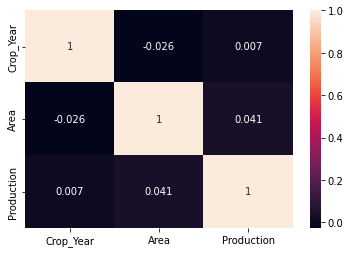

In [73]:
# checking correlation between variables

plt.tick_params(labelsize = 10)
sns.heatmap(df.corr(),annot=True)

We cannot see any high correlation between variables

In [74]:
# Counting unique states and districts

df[['District_Name', 'State_Name']].nunique()

District_Name    646
State_Name        33
dtype: int64

There are 33 states and 646 districts in the dataset.
Note:- UTs are also counted as states

In [75]:
#checking null values in the dataset

df.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

There are 3730 null values in Production column

In [76]:
# dropping null values as if we compare the whole dataset null values are less than 5% so there will not be very high impact on the results

df.dropna(inplace=True, axis=0)

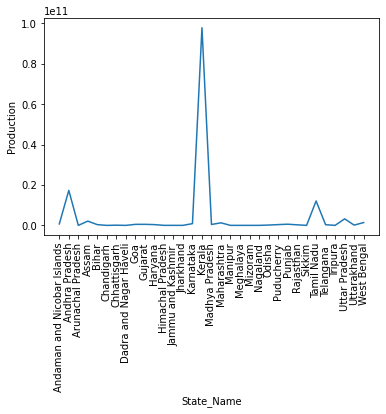

In [77]:
#checking production by State

State_pro = df.groupby("State_Name",axis=0).agg({"Production":np.sum})
plt.xticks(rotation = 90)
sns.lineplot(data=State_pro,x='State_Name', y='Production')

In [78]:
#checking production by District

Dist_pro = df.groupby("District_Name",axis=0).agg({"Production":np.sum}).sort_values('Production',ascending=False).head(10)
print(Dist_pro)

#presting limited results as there are 646 Districts in the dataset

                      Production
District_Name                   
KOZHIKODE           1.528074e+10
MALAPPURAM          1.451840e+10
THIRUVANANTHAPURAM  1.002271e+10
THRISSUR            9.923508e+09
KANNUR              9.783432e+09
EAST GODAVARI       8.271057e+09
KASARAGOD           7.732217e+09
KOLLAM              7.151945e+09
PALAKKAD            6.369382e+09
ERNAKULAM           5.021649e+09


In [79]:
#checking production by Year

Year_pro = df.groupby("Crop_Year",axis=0).agg({"Production":np.sum})
print(Year_pro)

             Production
Crop_Year              
1997       8.512329e+08
1998       5.825321e+09
1999       6.434666e+09
2000       7.449709e+09
2001       7.465541e+09
2002       7.696955e+09
2003       7.917974e+09
2004       8.189462e+09
2005       8.043757e+09
2006       8.681913e+09
2007       6.879442e+09
2008       7.717018e+09
2009       7.660494e+09
2010       6.307609e+09
2011       1.430890e+10
2012       8.171055e+09
2013       1.290359e+10
2014       8.664541e+09
2015       6.935065e+06


In [80]:
# Checking seasons

df.groupby('Crop',axis=0).agg({"Production":np.sum})

#There are total 6 seasons

,Production
Crop,
Apple,0.000000e+00
Arcanut (Processed),1.928310e+05
Arecanut,2.034659e+07
Arhar/Tur,3.933139e+07
Ash Gourd,0.000000e+00
...,...
Wheat,1.332826e+09
Yam,0.000000e+00
other fibres,0.000000e+00
